In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data=pd.read_csv('Salary_Dataset_with_Extra_Features.csv')

In [16]:
data

,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


In [46]:
data.isna().any() 

Rating               False
Company Name         False
Job Title            False
Salary               False
Salaries Reported    False
Location             False
Employment Status    False
Job Roles            False
dtype: bool

There are no missing (NaN) values in the dataset

In [112]:
def distribution(feature):
    plt.figure(figsize=(20,6))
    plt.subplot(1,4,1)
    sns.histplot(data,x=feature,kde=True,element='step',stat='density')
    plt.title("PDF")
    plt.subplot(1,4,2)
    sns.histplot(data,x=feature,kde=True,element='step',cumulative=True,stat='density')
    plt.title("CDF")
    plt.subplot(1,4,3)
    sns.boxplot(x=feature,data=data)
    plt.title("BOX plot")
    plt.subplot(1,4,4)
    sns.violinplot(x=feature,data=data)
    plt.title('Violin plot')
def count_plot(feature,width=8,height=5,font=10):   
    cat_count=[]
    plt.figure(figsize=(width,height))    
    cat_unique=data[feature].unique()
    for i in (cat_unique):
        if str(i)=='nan':
            cat_count.append(data[feature].isna().sum())
        else:
            cat_count.append(len(data[data[feature]==i]))
    cat_unique=list(map(lambda x: str(x),cat_unique))
    a=sns.barplot(y=cat_count,x=cat_unique)
    plt.bar_label(a.containers[0])
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.title(f"{feature} plot")

## Ratings Feature

In [23]:
print(f"Minimum rating is {data['Rating'].min()} and maximum rating is {data['Rating'].max()}")

Minimum rating is 1.0 and maximum rating is 5.0


In [26]:
data['Rating'].describe()

count    22770.000000
mean         3.918213
std          0.519675
min          1.000000
25%          3.700000
50%          3.900000
75%          4.200000
max          5.000000
Name: Rating, dtype: float64

Most of the ratings are inbetween 3.7 (25th percentile) to 4.2 (75th percentile)

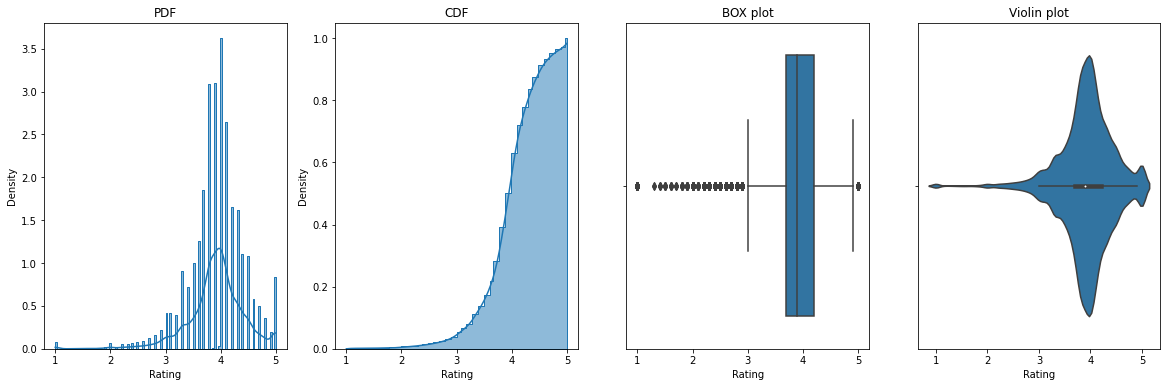

In [44]:
distribution('Rating')

* More number of ratings lies near 4 rating.
* Most of the reviews are biased towards positive side 

## Company Name feature

In [61]:
data['Company Name'].describe()

count                         22770
unique                        11261
top       Tata Consultancy Services
freq                            271
Name: Company Name, dtype: object

In [71]:
data['Company Name'].value_counts()Job

Tata Consultancy Services         271
Amazon                            184
Infosys                           169
Accenture                         150
Cognizant Technology Solutions    144
                                 ... 
Talent Anywhere                     1
WisdmLabs                           1
Softdel                             1
Dentsu                              1
Nextgen Innovation Labs             1
Name: Company Name, Length: 11261, dtype: int64

Text(0.5, 0, 'no of employes in a company')

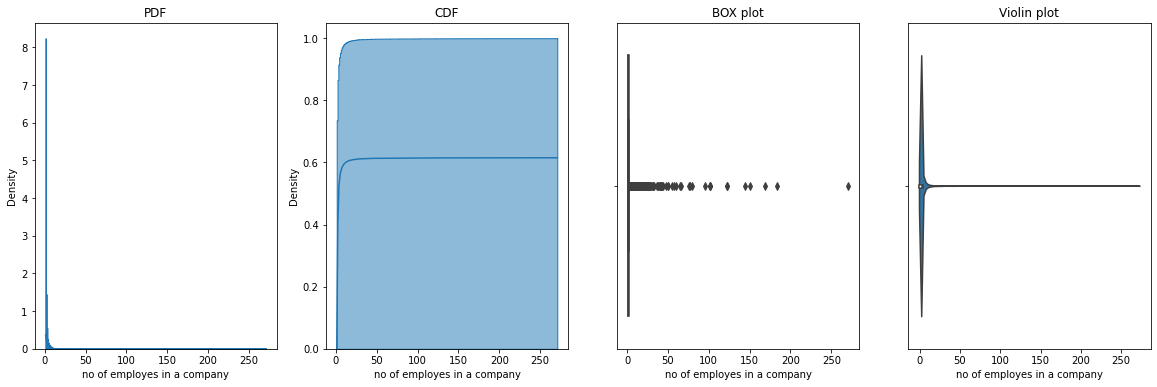

In [87]:
no_of_employees=data['Company Name'].value_counts().to_numpy()
feature=no_of_employees
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.histplot(x=feature,kde=True,element='step',stat='density')
plt.title("PDF")
plt.xlabel("no of employes in a company")
plt.subplot(1,4,2)
sns.histplot(x=feature,kde=True,element='step',cumulative=True,stat='density')
plt.title("CDF")
plt.xlabel("no of employes in a company")

plt.subplot(1,4,3)
plt.xlabel("no of employes in a company")

sns.boxplot(x=feature)
plt.title("BOX plot")
plt.xlabel("no of employes in a company")

plt.subplot(1,4,4)

sns.violinplot(x=feature)
plt.title('Violin plot')
plt.xlabel("no of employes in a company")


Zooming in the above plot 

Text(0.5, 0, 'no of employes in a company')

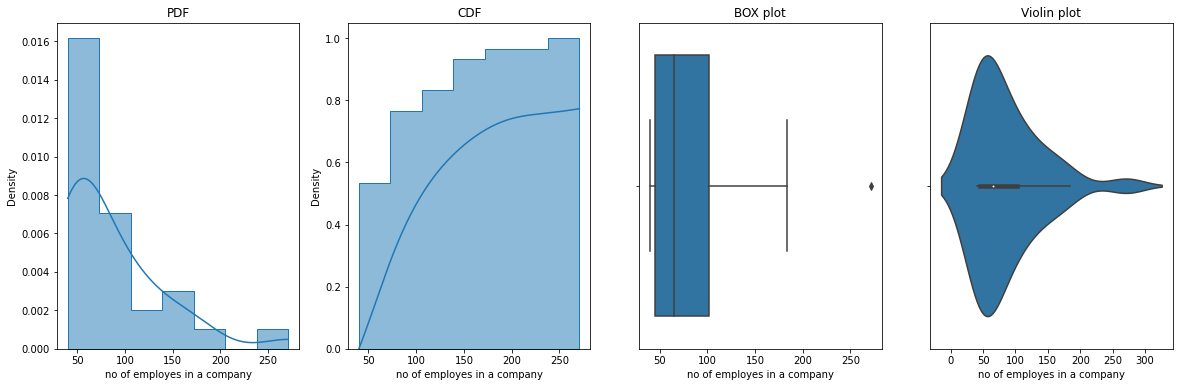

In [88]:
no_of_employees=data['Company Name'].value_counts().to_numpy()
feature=no_of_employees[:30]
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.histplot(x=feature,kde=True,element='step',stat='density')
plt.title("PDF")
plt.xlabel("no of employes in a company")
plt.subplot(1,4,2)
sns.histplot(x=feature,kde=True,element='step',cumulative=True,stat='density')
plt.title("CDF")
plt.xlabel("no of employes in a company")

plt.subplot(1,4,3)
plt.xlabel("no of employes in a company")

sns.boxplot(x=feature)
plt.title("BOX plot")
plt.xlabel("no of employes in a company")

plt.subplot(1,4,4)

sns.violinplot(x=feature)
plt.title('Violin plot')
plt.xlabel("no of employes in a company")


Most of the employees are only in top few companies 

## Job title feature 

In [80]:
data['Job Title'].value_counts()

Software Development Engineer          2351
Android Developer                      2029
Software Development Engineer (SDE)    1614
Front End Developer                    1412
Test Engineer                          1314
                                       ... 
Java Andriod Developer                    1
Java Deceloper                            1
Java/J2EE Programmer                      1
Java SOA Developer                        1
Associate Web Developer                   1
Name: Job Title, Length: 1080, dtype: int64

In [107]:
data['Job Title'].describe()

count                             22770
unique                             1080
top       Software Development Engineer
freq                               2351
Name: Job Title, dtype: object

Text(0.5, 1.0, 'Violin plot')

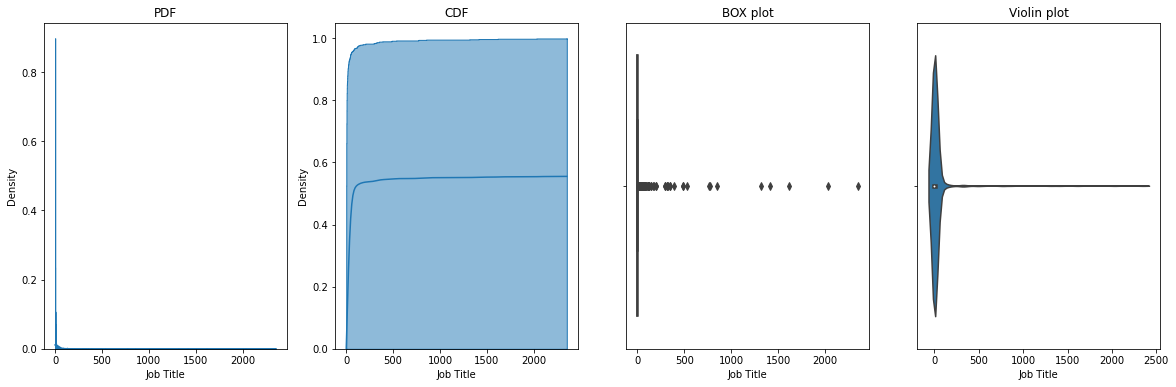

In [82]:
job_titles=data['Job Title'].value_counts()
no_of_employees=data['Company Name'].value_counts().to_numpy()
feature=job_titles
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.histplot(x=feature,kde=True,element='step',stat='density')
plt.title("PDF")
plt.subplot(1,4,2)
sns.histplot(x=feature,kde=True,element='step',cumulative=True,stat='density')
plt.title("CDF")
plt.subplot(1,4,3)
sns.boxplot(x=feature)
plt.title("BOX plot")
plt.subplot(1,4,4)
sns.violinplot(x=feature)
plt.title('Violin plot')

Zooming in the above plot 

Text(0.5, 1.0, 'Violin plot')

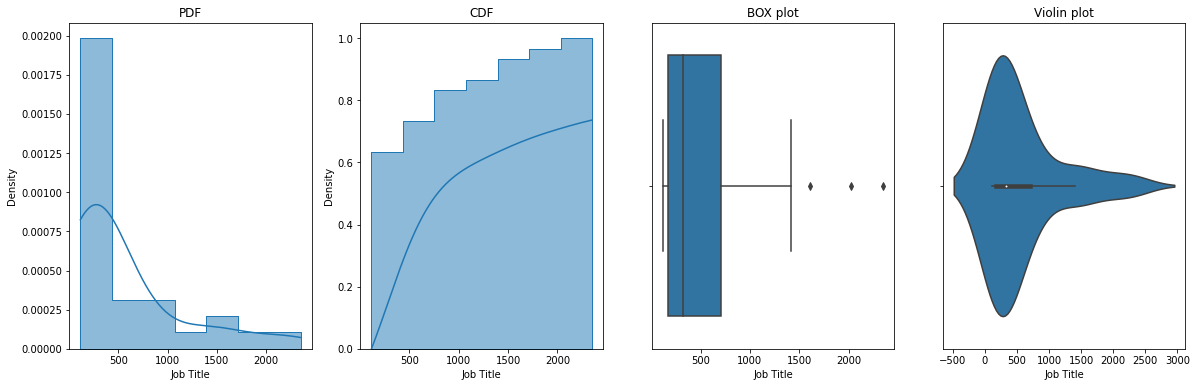

In [84]:
job_titles=data['Job Title'].value_counts()
no_of_employees=data['Company Name'].value_counts().to_numpy()
feature=job_titles[:30]
plt.figure(figsize=(20,6))
plt.subplot(1,4,1)
sns.histplot(x=feature,kde=True,element='step',stat='density')
plt.title("PDF")
plt.subplot(1,4,2)
sns.histplot(x=feature,kde=True,element='step',cumulative=True,stat='density')
plt.title("CDF")
plt.subplot(1,4,3)
sns.boxplot(x=feature)
plt.title("BOX plot")
plt.subplot(1,4,4)
sns.violinplot(x=feature)
plt.title('Violin plot')

Most of the employee's role is of top few roles only 

## Salary feature 

In [91]:
data['Salary'].describe()

count    2.277000e+04
mean     6.953872e+05
std      8.843990e+05
min      2.112000e+03
25%      3.000000e+05
50%      5.000000e+05
75%      9.000000e+05
max      9.000000e+07
Name: Salary, dtype: float64

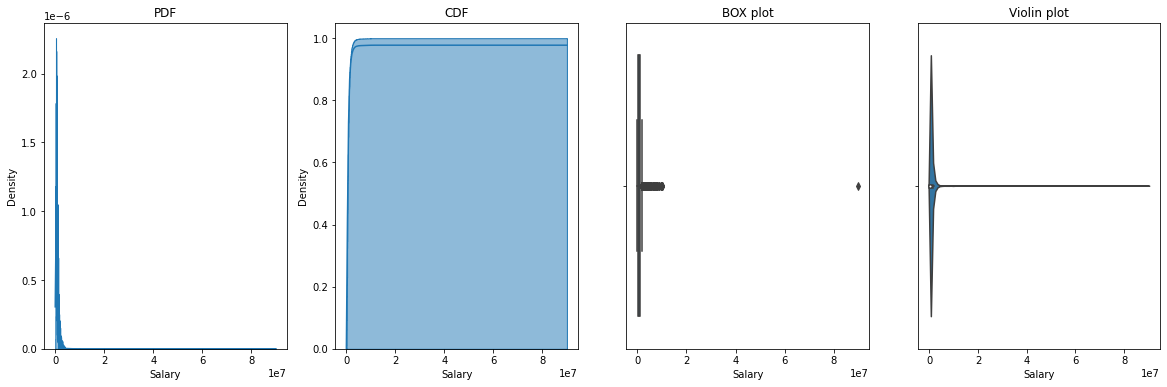

In [92]:
distribution('Salary')

Most of the employee's salary ranging between 3.000000e+05 (25th percentile) and 9.000000e+05 (75th percentile )

In [106]:
data['Salaries Reported'].value_counts()

1      18206
2       2401
3        789
4        382
5        228
       ...  
39         1
162        1
361        1
135        1
100        1
Name: Salaries Reported, Length: 82, dtype: int64

In [100]:
data['Salaries Reported'].describe()

count    22770.000000
mean         1.855775
std          6.823668
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        361.000000
Name: Salaries Reported, dtype: float64

Top companies are reported salaries most of the times

## Employment Status feature

In [105]:
data['Employment Status'].value_counts()

Full Time     20083
Intern         2106
Contractor      548
Trainee          33
Name: Employment Status, dtype: int64

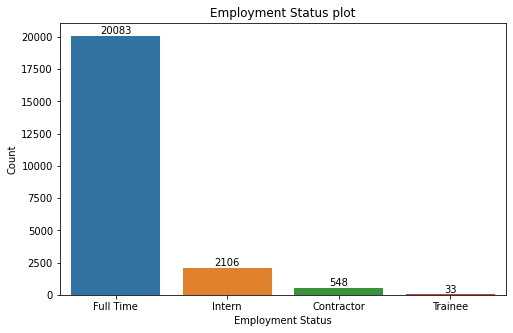

In [113]:
count_plot('Employment Status')

Most of the employment status is full time employment

In [114]:
data


,Rating,Company Name,Job Title,Salary,Salaries Reported,Location,Employment Status,Job Roles
0,3.8,Sasken,Android Developer,400000,3,Bangalore,Full Time,Android
1,4.5,Advanced Millennium Technologies,Android Developer,400000,3,Bangalore,Full Time,Android
2,4.0,Unacademy,Android Developer,1000000,3,Bangalore,Full Time,Android
3,3.8,SnapBizz Cloudtech,Android Developer,300000,3,Bangalore,Full Time,Android
4,4.4,Appoids Tech Solutions,Android Developer,600000,3,Bangalore,Full Time,Android
...,...,...,...,...,...,...,...,...
22765,4.7,Expert Solutions,Web Developer,200000,1,Bangalore,Full Time,Web
22766,4.0,Nextgen Innovation Labs,Web Developer,300000,1,Bangalore,Full Time,Web
22767,4.1,Fresher,Full Stack Web Developer,192000,13,Bangalore,Full Time,Web
22768,4.1,Accenture,Full Stack Web Developer,300000,7,Bangalore,Full Time,Web


## Location feature

In [119]:
data['Location'].value_counts()

Bangalore         8264
Hyderabad         4467
New Delhi         4176
Chennai           2458
Pune              2134
Mumbai             749
Kolkata            178
Madhya Pradesh     155
Kerala             108
Jaipur              81
Name: Location, dtype: int64

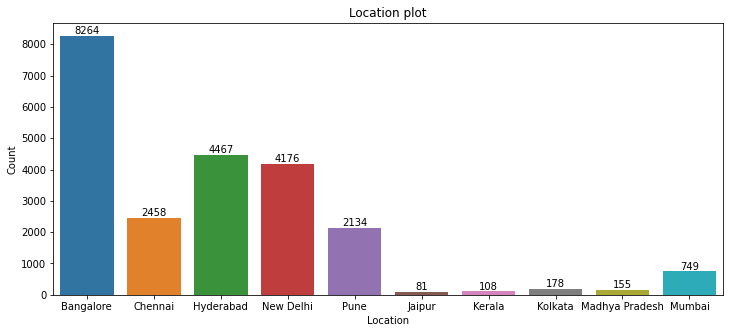

In [131]:
count_plot('Location',width=12)

Most of the employees are in bangalore followed by hyderabad and new delhi

In [123]:
data['Job Title'].value_counts()

Software Development Engineer          2351
Android Developer                      2029
Software Development Engineer (SDE)    1614
Front End Developer                    1412
Test Engineer                          1314
                                       ... 
Java Andriod Developer                    1
Java Deceloper                            1
Java/J2EE Programmer                      1
Java SOA Developer                        1
Associate Web Developer                   1
Name: Job Title, Length: 1080, dtype: int64

In [125]:
data['Job Title'].describe()

count                             22770
unique                             1080
top       Software Development Engineer
freq                               2351
Name: Job Title, dtype: object

Most of the employee job title are of few top job titles only

## Job Roles feature

In [128]:
data['Job Roles'].value_counts()

SDE         8183
Android     2945
Frontend    2163
Java        1858
Testing     1740
IOS         1631
Backend     1194
Web          999
Python       947
Database     865
Mobile       245
Name: Job Roles, dtype: int64

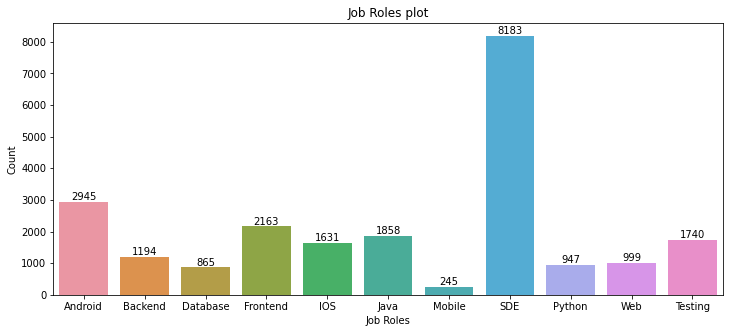

In [130]:
count_plot('Job Roles',width=12)

Most of the employees are of SDE job role